In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

DATA=pd.read_csv('SkewDATA.csv')
NEW_DATA=DATA.set_index(['PART_NO','ATTEMPT','Sample']).pivot( columns='STARTUP')[['SK0','SK1','SK2','SK3']].groupby(['PART_NO','ATTEMPT']).min()
NEW_DATA.to_csv('SkewDATA_new.csv')


,PART_NO,STARTUP,ATTEMPT,Sample,TP3_Lol,PATT,ADC_POWER,errCnt,bitCnt,locked,...,SNR_A2,SNR_A3,SNR_B0,SNR_B1,SNR_B2,SK0,SK1,SK2,SK3,Unnamed: 23
0,241,DEF,0,0,0,PRBS31,-12.003196,NaN,NaN,1,...,25.383,25.891,18.430,18.148,18.734,127,248,121,97,NaN
1,241,DEF,0,1,0,PRBS31,-11.994796,NaN,NaN,1,...,25.441,25.816,18.430,18.148,18.836,127,248,121,97,NaN
2,241,DEF,0,2,0,PRBS31,-11.978044,NaN,NaN,1,...,25.266,25.758,18.289,18.125,18.711,127,248,121,97,NaN
3,241,DEF,0,3,0,PRBS31,-11.986412,NaN,NaN,1,...,25.441,25.816,18.430,18.125,18.836,127,248,121,97,NaN
4,241,DEF,0,4,0,PRBS31,-11.994796,NaN,NaN,1,...,25.441,25.559,18.406,18.125,18.758,127,248,121,97,NaN
5,241,DEF-minSK+1,0,0,0,PRBS31,-11.924042,NaN,NaN,1,...,24.984,25.559,18.289,17.891,18.523,31,137,36,20,NaN
6,241,DEF-minSK+1,0,1,0,PRBS31,-11.919916,NaN,NaN,1,...,24.879,25.688,18.289,17.891,18.523,31,137,36,20,NaN
7,241,DEF-minSK+1,0,2,0,PRBS31,-11.919916,NaN,NaN,1,...,24.879,25.688,18.289,17.891,18.547,31,137,36,20,NaN
8,241,DEF-minSK+1,0,3,0,PRBS31,-11.919916,NaN,NaN,1,...,24.984,25.688,18.289,17.891,18.523,31,137,36,20,NaN
9,241,DEF-minSK+1,0,4,0,PRBS31,-11.911675,NaN,NaN,1,...,24.984,25.688,18.289,17.891,18.547,31,137,36,20,NaN


In [189]:
NEW_DATA=DATA.groupby(['PART_NO','ATTEMPT','STARTUP']).min()
NEW_DATA=NEW_DATA[['SK0','SK1','SK2','SK3']]
NEW_DATA['minSK'] = NEW_DATA[['SK0','SK1','SK2','SK3']].apply(min, axis=1)
NEW_DATA=NEW_DATA.reset_index().set_index(['PART_NO','ATTEMPT']).pivot( columns='STARTUP')[['SK0','SK1','SK2','SK3','minSK']]
NEW_DATA.columns = NEW_DATA.columns.to_series().str.join('_')
NEW_DATA['SK0_Diff']=(NEW_DATA['SK0_DEF']-NEW_DATA['SK0_DEF-minSK+1'])
NEW_DATA['SK1_Diff']=(NEW_DATA['SK1_DEF']-NEW_DATA['SK1_DEF-minSK+1'])
NEW_DATA['SK2_Diff']=(NEW_DATA['SK2_DEF']-NEW_DATA['SK2_DEF-minSK+1'])
NEW_DATA['SK3_Diff']=(NEW_DATA['SK3_DEF']-NEW_DATA['SK3_DEF-minSK+1'])
NEW_DATA['minSK_Diff']=(NEW_DATA['minSK_DEF']-NEW_DATA['minSK_DEF-minSK+1'])
NEW_DATA['SK0_Delta']=(NEW_DATA['SK0_Diff']-NEW_DATA['minSK_Diff'])
NEW_DATA['SK1_Delta']=(NEW_DATA['SK1_Diff']-NEW_DATA['minSK_Diff'])
NEW_DATA['SK2_Delta']=(NEW_DATA['SK2_Diff']-NEW_DATA['minSK_Diff'])
NEW_DATA['SK3_Delta']=(NEW_DATA['SK3_Diff']-NEW_DATA['minSK_Diff'])
NEW_DATA['SK0_Ratio']=(NEW_DATA['minSK_Diff']+NEW_DATA['SK0_Delta'])/(NEW_DATA['minSK_Diff'])
NEW_DATA['SK1_Ratio']=(NEW_DATA['minSK_Diff']+NEW_DATA['SK1_Delta'])/(NEW_DATA['minSK_Diff'])
NEW_DATA['SK2_Ratio']=(NEW_DATA['minSK_Diff']+NEW_DATA['SK2_Delta'])/(NEW_DATA['minSK_Diff'])
NEW_DATA['SK3_Ratio']=(NEW_DATA['minSK_Diff']+NEW_DATA['SK3_Delta'])/(NEW_DATA['minSK_Diff'])
NEW_DATA[['minSK_Diff','SK0_DEF','SK0_Delta','SK0_Ratio','SK1_DEF','SK1_Delta','SK1_Ratio',\
          'SK2_DEF','SK2_Delta','SK2_Ratio','SK3_DEF','SK3_Delta','SK3_Ratio']]

NEW_DATA1 = NEW_DATA[['minSK_Diff','SK0_DEF','SK0_Delta','SK0_Ratio']].rename(columns={'SK0_DEF':'SK_DEF','SK0_Delta':'SK_Delta','SK0_Ratio':'SK_Ratio'})
ADD_DATA = NEW_DATA[['minSK_Diff','SK1_DEF','SK1_Delta','SK1_Ratio']].rename(columns={'SK1_DEF':'SK_DEF','SK1_Delta':'SK_Delta','SK1_Ratio':'SK_Ratio'})
NEW_DATA1 = NEW_DATA1.append(ADD_DATA, ignore_index=True)
ADD_DATA = NEW_DATA[['minSK_Diff','SK2_DEF','SK2_Delta','SK2_Ratio']].rename(columns={'SK2_DEF':'SK_DEF','SK2_Delta':'SK_Delta','SK2_Ratio':'SK_Ratio'})
NEW_DATA1 = NEW_DATA1.append(ADD_DATA, ignore_index=True)
ADD_DATA = NEW_DATA[['minSK_Diff','SK3_DEF','SK3_Delta','SK3_Ratio']].rename(columns={'SK3_DEF':'SK_DEF','SK3_Delta':'SK_Delta','SK3_Ratio':'SK_Ratio'})
NEW_DATA1 = NEW_DATA1.append(ADD_DATA, ignore_index=True).dropna()
NEW_DATA1

,minSK_Diff,SK_DEF,SK_Delta,SK_Ratio
0,28,127,-7,0.750000
1,31,127,-9,0.709677
2,30,127,-5,0.833333
3,32,127,-9,0.718750
4,28,127,-7,0.750000
5,30,127,-5,0.833333
6,32,127,-7,0.781250
7,30,127,-7,0.766667
8,29,127,-7,0.758621
9,28,127,-7,0.750000


In [230]:
for i in range(len([0,1])-1):
    print(i)

0


<Figure size 1728x1152 with 0 Axes>

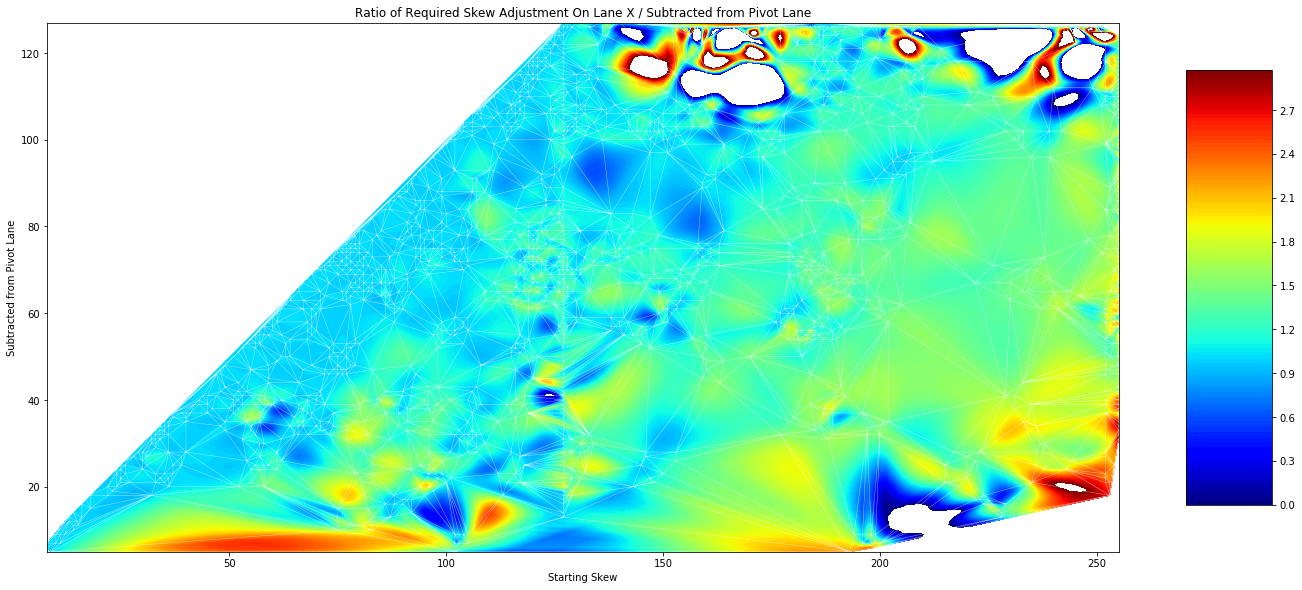

In [227]:
import matplotlib.tri as tri
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.art3d as art3d
import matplotlib.cm as cm

fig = plt.figure(figsize=(24,16))#(figsize=(8*(len(modules)),8*(len(param))))
plt.tight_layout() # Or equivalently,  "plt.tight_layout()"

NEW_DATA_CHART=NEW_DATA1.groupby(['SK_DEF','minSK_Diff']).max().replace([np.inf, -np.inf], np.nan).dropna().reset_index()
NEW_DATA_CHART.drop(NEW_DATA_CHART['SK_Ratio'].idxmax(),inplace=True)
for i in range(10):
    NEW_DATA_CHART.drop(NEW_DATA_CHART['SK_Ratio'].idxmin(),inplace=True)
#df.loc[df['sq_resid']!=df['sq_resid'].max()]
NEW_DATA_CHART= NEW_DATA_CHART.loc[NEW_DATA_CHART['minSK_Diff']>0]
NEW_DATA_CHART= NEW_DATA_CHART.loc[NEW_DATA_CHART['SK_DEF']<=256]
NEW_DATA_CHART= NEW_DATA_CHART.loc[NEW_DATA_CHART['SK_DEF']>=0]


x=NEW_DATA_CHART['SK_DEF'].values
y=NEW_DATA_CHART['minSK_Diff'].values
NEW_DATA_CHART['SK_Ratio']=[i if i>1 else 1 for i in NEW_DATA_CHART['SK_Ratio']]
z=NEW_DATA_CHART['SK_Ratio'].values

# Now create the Triangulation.
# (Creating a Triangulation without specifying the triangles results in the
# Delaunay triangulation of the points.)
triang = tri.Triangulation(x, y)

# First create the x and y coordinates of the points.
n_angles = 20
n_radii = 10
min_radius = 0.15
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2 * np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += np.pi / n_angles

# Mask off unwanted triangles.
triang.set_mask(np.hypot(x[triang.triangles].mean(axis=1),
                         y[triang.triangles].mean(axis=1))
                < min_radius)

#-----------------------------------------------------------------------------
# Refine data
#-----------------------------------------------------------------------------
refiner = tri.UniformTriRefiner(triang)
tri_refi, z_test_refi = refiner.refine_field(z, subdiv=3)

#-----------------------------------------------------------------------------
# Plot the triangulation and the high-res iso-contours
#-----------------------------------------------------------------------------
#fig, ax = plt.subplots()
fig = plt.figure(figsize=(24,16))#(figsize=(8*(len(modules)),8*(len(param))))
plt.tight_layout() # Or equivalently,  "plt.tight_layout()"
ax = fig.add_subplot(1, 1, 1)

ax.set_aspect('equal')
ax.triplot(triang, lw=0.4, color='white',alpha=.7)

levels = np.arange(0., 3., 0.025)
cmap = cm.get_cmap(name='jet', lut=None)
surf=ax.tricontourf(tri_refi, z_test_refi, levels=levels, cmap=cmap)
#ax.tricontour(tri_refi, z_test_refi, levels=levels,
#               colors=['0.25', '0.5', '0.5', '0.5', '0.5'],
#               linewidths=[.2, 0.1, 0.1, 0.1, 0.1])

ax.set_title("Ratio of Required Skew Adjustment On Lane X / Subtracted from Pivot Lane")
ax.set_xlabel('Starting Skew')
ax.set_ylabel('Subtracted from Pivot Lane')
c = fig.colorbar(surf, shrink=0.5, aspect=5, extend='both')

plt.show()

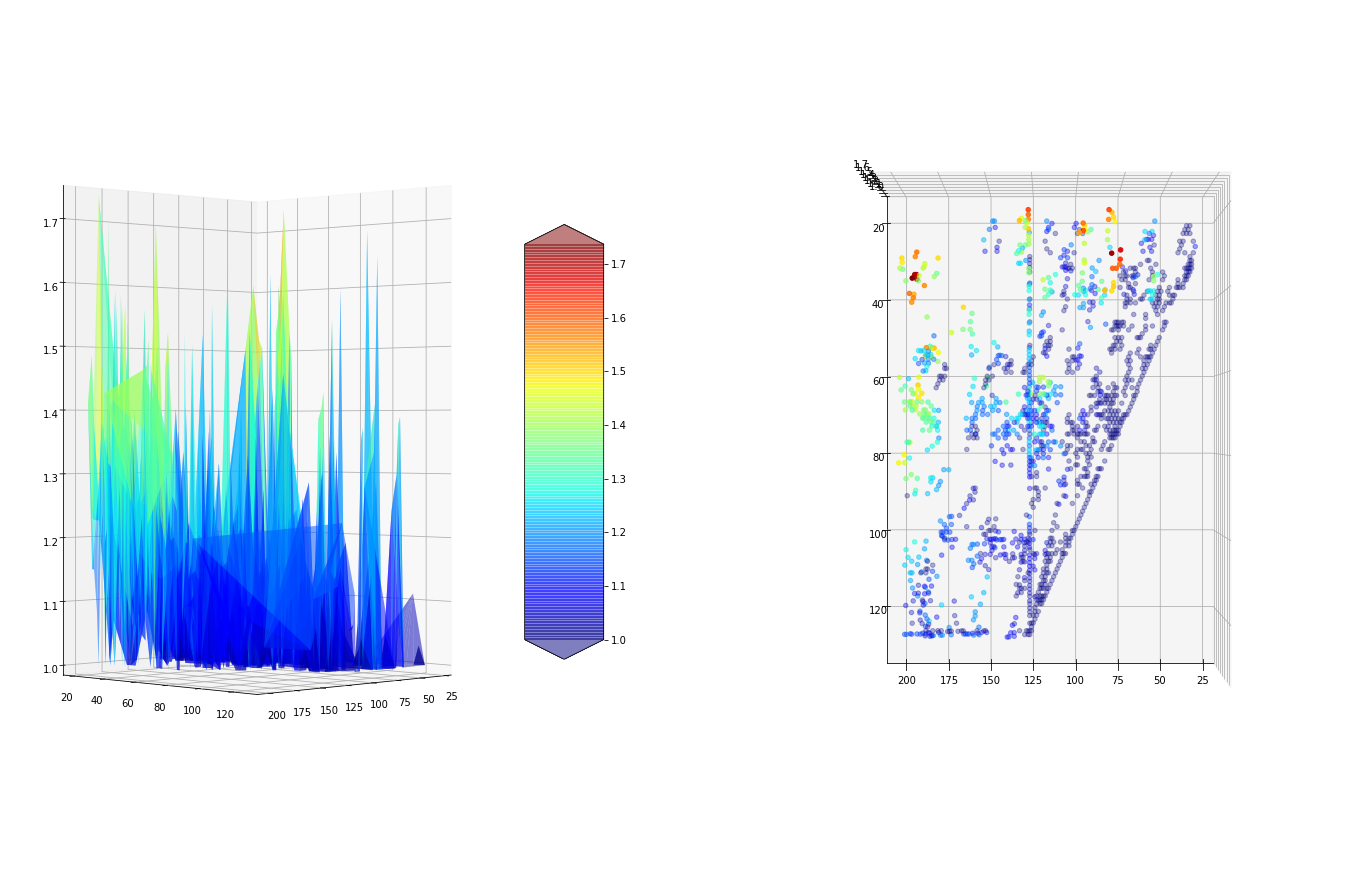

In [197]:
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.art3d as art3d

fig = plt.figure(figsize=(24,16))#(figsize=(8*(len(modules)),8*(len(param))))
plt.tight_layout() # Or equivalently,  "plt.tight_layout()"

NEW_DATA_CHART=NEW_DATA1.groupby(['SK_DEF','minSK_Diff']).max().replace([np.inf, -np.inf], np.nan).dropna().reset_index()
NEW_DATA_CHART.drop(NEW_DATA_CHART['SK_Ratio'].idxmax(),inplace=True)
for i in range(10):
    NEW_DATA_CHART.drop(NEW_DATA_CHART['SK_Ratio'].idxmin(),inplace=True)
#df.loc[df['sq_resid']!=df['sq_resid'].max()]
NEW_DATA_CHART= NEW_DATA_CHART.loc[NEW_DATA_CHART['minSK_Diff']>20]
NEW_DATA_CHART= NEW_DATA_CHART.loc[NEW_DATA_CHART['SK_DEF']<200]
NEW_DATA_CHART= NEW_DATA_CHART.loc[NEW_DATA_CHART['SK_DEF']>30]


x=NEW_DATA_CHART['SK_DEF']
y=NEW_DATA_CHART['minSK_Diff']
NEW_DATA_CHART['SK_Ratio']=[i if i>1 else 1 for i in NEW_DATA_CHART['SK_Ratio']]
z=NEW_DATA_CHART['SK_Ratio']



#z1=(10*z)**2

#ax = fig.add_subplot(1,1,1)
#ax.scatter(x, y, z1, c=colors)#, c='r', marker='o')

ax = fig.add_subplot(1, 2, 1, projection='3d')
surf=ax.plot_trisurf(x, y[::-1], z,cmap=plt.cm.jet, alpha=.5, vmax=z.max(),vmin=z.min(),linewidth=0.5)
ax.tricontour(triangulation, ...)
ax.view_init(0,45)
c = fig.colorbar(surf, shrink=0.5, aspect=5, extend='both')

ax = fig.add_subplot(1, 2, 2, projection='3d')
colors = z
##colors = [i if i>1 else 0.1 for i in z]
##colors = [i if i<1.8 else 2 for i in colors]
surf=ax.scatter(x, y, z,c=colors,cmap=plt.cm.jet)

#for xi, yi, zi in zip(x, y, z):        
#    line=art3d.Line3D(*zip((xi, yi, 0), (xi, yi, zi)), marker='o')
#    ax.add_line(line)
#for xx,yy,zz in zip(x,y,z): ax.plot([xx,xx],[yy,yy],[0,zz], '-')
    
ax.view_init(90,90)

#surf.set_clim(vmin=0, vmax=2)

#plt.imshow(z, origin="lower", cmap=plt.cm.cool, interpolation='nearest')
#plt.colorbar()
#ax.view_init(15, 135)
plt.show()